In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load Train Data

In [117]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# Change the style for having centered plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

## Data Preprocessing

### Handle Missing Values

In [120]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
df.drop(labels="Cabin", axis=1, inplace=True)

In [122]:
# Handling missing values of Age column
from sklearn.impute import SimpleImputer

# Define the column you want to impute
column_to_impute = "Age"

# Create SimpleImputer for just the specified column
my_imputer = SimpleImputer(strategy='median')  # You can specify different strategies like 'mean', 'median', 'most_frequent', etc.

# Fit and transform the specified column
df[column_to_impute] = my_imputer.fit_transform(df[[column_to_impute]])

In [123]:
# Handling missing values of Embarked column
fill_value = df.loc[:, "Embarked"].value_counts().idxmax()
df["Embarked"].fillna(fill_value, inplace=True)

/tmp/ipykernel_33/1416062382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(fill_value, inplace=True)


In [124]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory data analysis

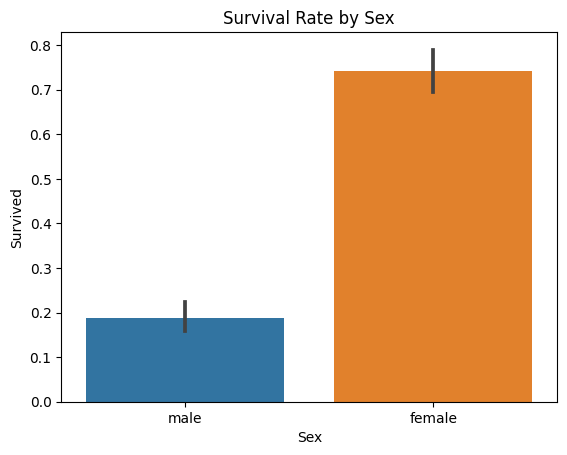

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

/tmp/ipykernel_33/1028402815.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gro

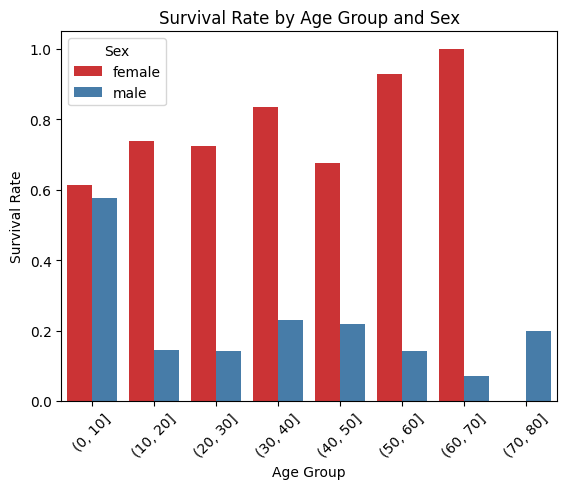

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating age groups for the next visualizations
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Grouped Bar Plot: Age Groups vs. Survival Rate by Sex
grouped = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()
sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=grouped, palette='Set1')
plt.xticks(rotation=45)
plt.title('Survival Rate by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

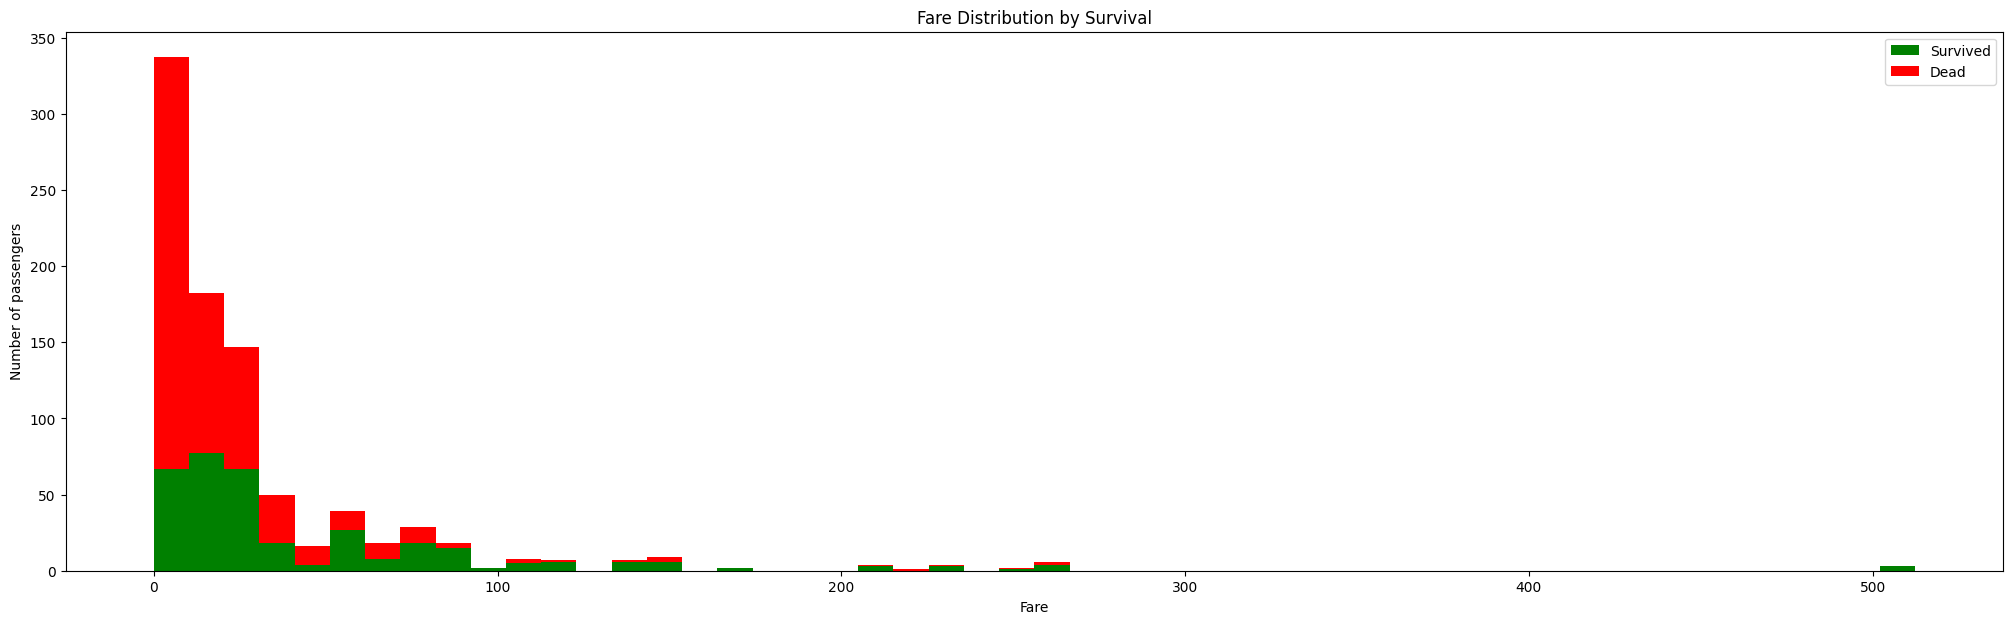

In [128]:
figure = plt.figure(figsize=(25, 7))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

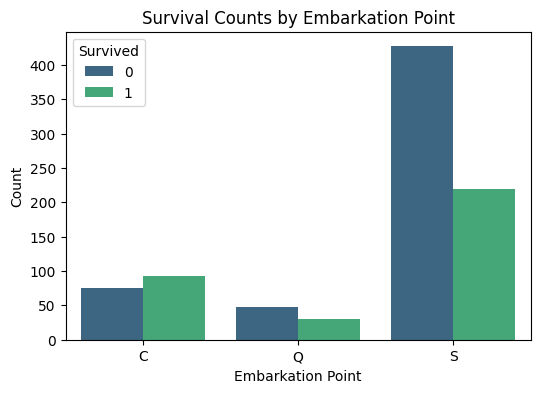

In [130]:
# Grouping data by Embarked and Survived, calculating the count of each group
grouped = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

# Setting up the plot
plt.figure(figsize=(6, 4))

# Bar plot
sns.barplot(x='Embarked', y='Count', hue='Survived', data=grouped, palette='viridis')

# Adding labels and title
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.title('Survival Counts by Embarkation Point')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Fare Distribution by Embarkation and Survival')

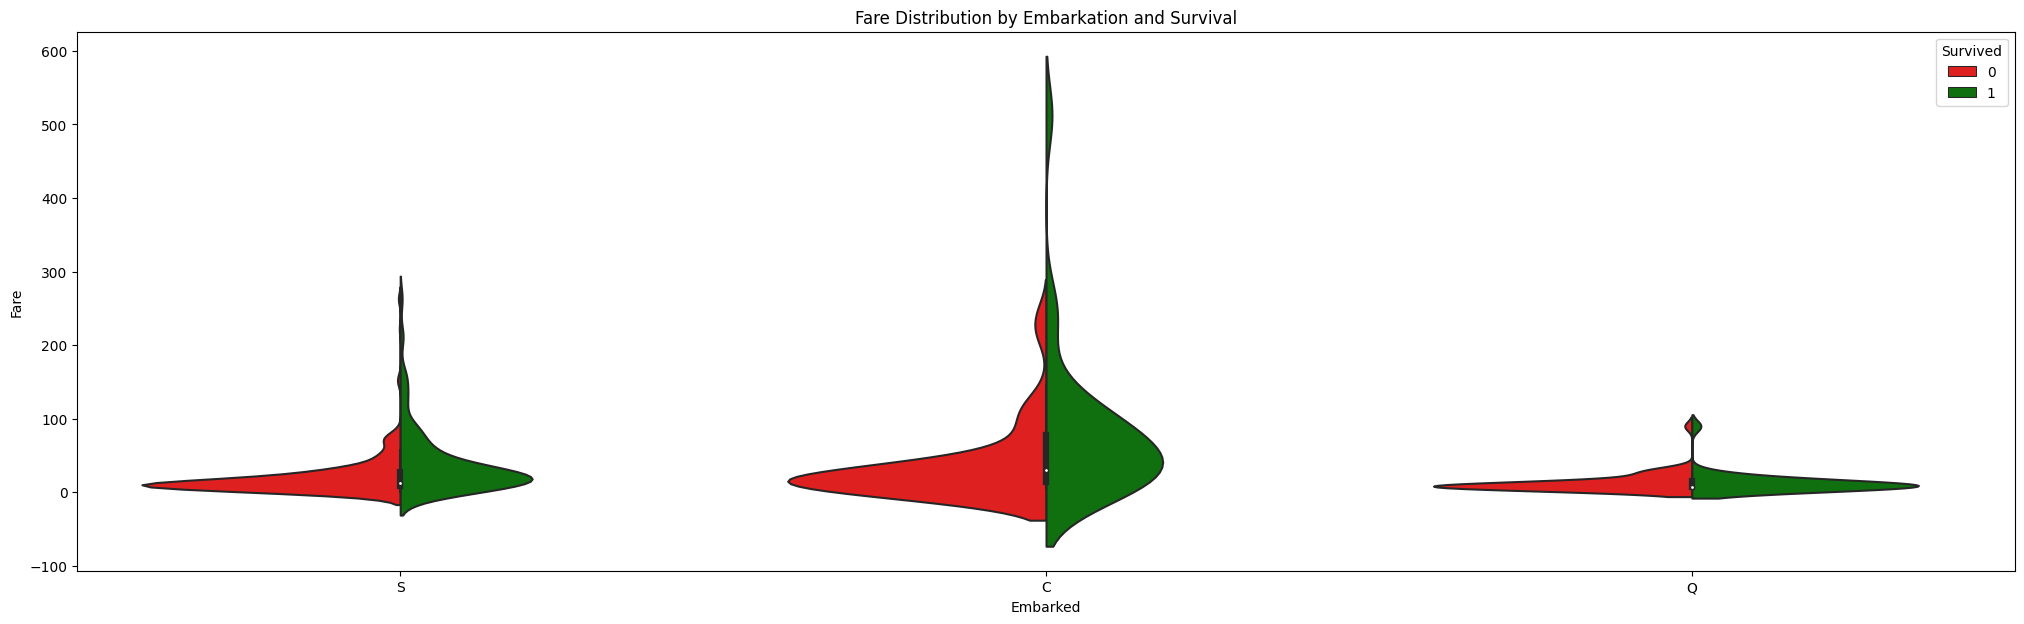

In [132]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df, split=True, palette={0: "r", 1: "g"});
plt.title('Fare Distribution by Embarkation and Survival')

## Feature Engineering

In [134]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [135]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [136]:
df["Titles"] = df["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip()).apply(lambda t: Title_Dictionary[t])

In [137]:
df['Titles'].value_counts()

Titles
Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64

In [138]:
df.drop("Name", axis=1, inplace=True)
df.drop("Age", axis=1, inplace=True)

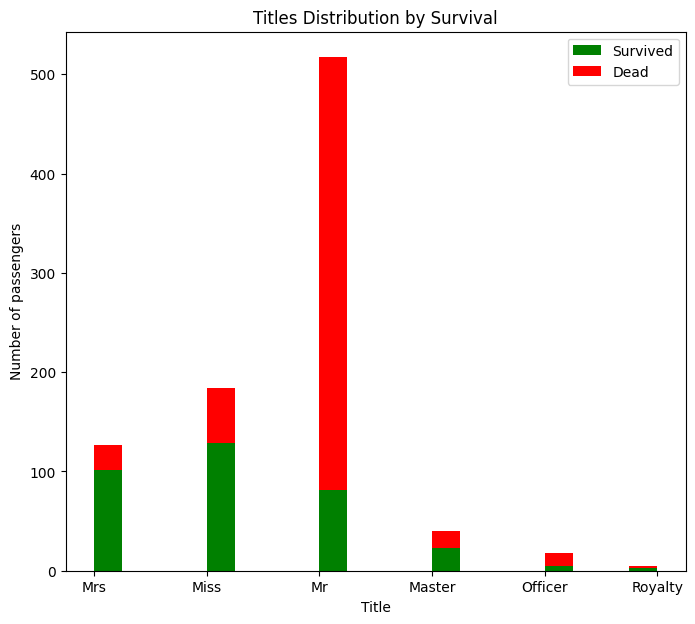

In [140]:
figure = plt.figure(figsize=(8, 7))
plt.hist([df[df['Survived'] == 1]['Titles'], df[df['Survived'] == 0]['Titles']], 
         stacked=True, color = ['g','r'],
         bins = 20, label = ['Survived','Dead'])
plt.title('Titles Distribution by Survival')
plt.xlabel('Title')
plt.ylabel('Number of passengers')
plt.legend();

In [141]:
# Calculate the FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch']

In [142]:
df.drop(["SibSp", "Parch"], axis=1, inplace=True)

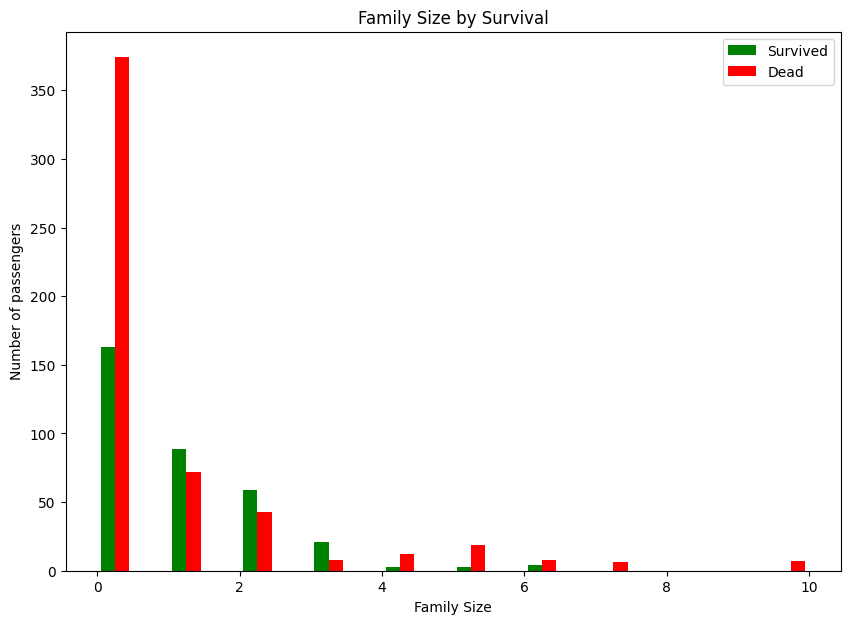

In [143]:
figure = plt.figure(figsize=(10, 7))
plt.hist([df[df['Survived'] == 1]['FamilySize'], df[df['Survived'] == 0]['FamilySize']], 
         stacked=False, color = ['g','r'],
         bins = 20, label = ['Survived','Dead'])

plt.title('Family Size by Survival')
plt.xlabel('Family Size')
plt.ylabel('Number of passengers')
plt.legend();

In [144]:
# Define a function to check if the first part of the ticket number is a digit
def is_first_part_digit(ticket):
    first_part = ticket.replace('.', ' ').replace('/', ' ').split()[0]
    return first_part.isdigit()

# Apply the function to the 'Ticket' column and convert the result to a Series
df['Ticket_is_digit'] = pd.Series(map(is_first_part_digit, df['Ticket']))


In [145]:
df.drop("Ticket", axis=1, inplace=True)

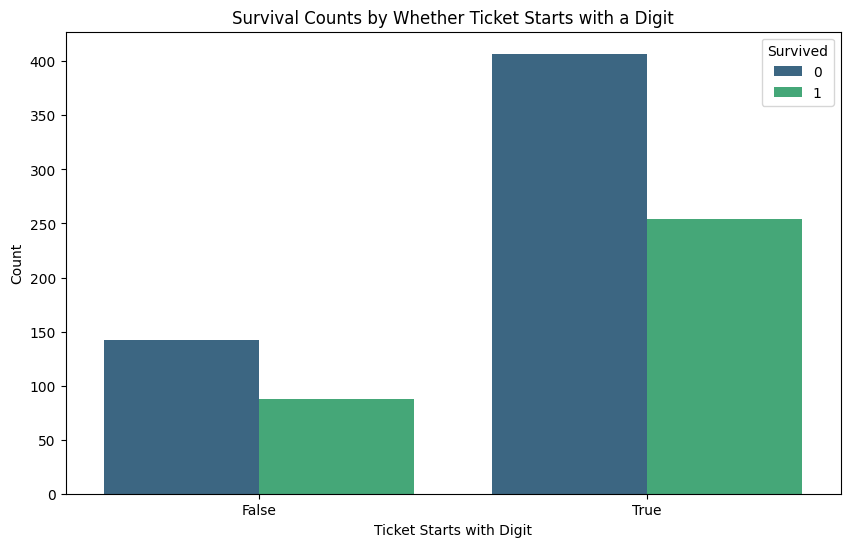

In [147]:
# Grouping data by digit_series and Survived, calculating the count of each group
grouped = df.groupby(['Ticket_is_digit', 'Survived']).size().reset_index(name='Count')

# Setting up the plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x='Ticket_is_digit', y='Count', hue='Survived', data=grouped, palette='viridis')

# Adding labels and title
plt.xlabel('Ticket Starts with Digit')
plt.ylabel('Count')
plt.title('Survival Counts by Whether Ticket Starts with a Digit')

# Display the plot
plt.show()

In [148]:
df.drop("Ticket_is_digit", axis=1, inplace=True)

In [149]:
df.set_index("PassengerId", inplace=True)

In [150]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeGroup,Titles,FamilySize
PassengerId,,,,,,,,
1,0,3,male,7.2500,S,"(20, 30]",Mr,1
2,1,1,female,71.2833,C,"(30, 40]",Mrs,1
3,1,3,female,7.9250,S,"(20, 30]",Miss,0
4,1,1,female,53.1000,S,"(30, 40]",Mrs,1
5,0,3,male,8.0500,S,"(30, 40]",Mr,0


## Model Selection

In [158]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_transformer = ColumnTransformer(
    transformers=[
        ('encoder_sex', OneHotEncoder(), ['Sex']),
        ('encoder_embarked', OneHotEncoder(), ['Embarked']),
        ('encoder_titles', OneHotEncoder(), ['Titles']),
        ('Age_category', OneHotEncoder(), ['AgeGroup'])
    ],
    remainder='passthrough'
)
# Build pipelines for logistic regression and random forest classifiers
logistic_regression_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

random_forest_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier())
])

# Create Gradient Boosting pipeline
Gradient_Boost_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('Gradient_boost', GradientBoostingClassifier(random_state=42))
])


# Train and evaluate logistic regression model
logistic_regression_pipeline.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_pipeline.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)

# Train and evaluate random forest model
random_forest_pipeline.fit(X_train, y_train)
random_forest_predictions = random_forest_pipeline.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

# Train and evaluate Gradient Boosting model
Gradient_Boost_pipeline.fit(X_train, y_train)
Gradient_Boost_predictions = random_forest_pipeline.predict(X_test)
Gradient_Boost_accuracy = accuracy_score(y_test, Gradient_Boost_predictions)
Gradient_Boost_conf_matrix = confusion_matrix(y_test, Gradient_Boost_predictions)

# Print results
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logistic_regression_conf_matrix)

print("\nRandom Forest Accuracy:", random_forest_accuracy)
print("Random Forest Confusion Matrix:")
print(random_forest_conf_matrix)

print("\n Gradient Boost Accuracy:", Gradient_Boost_accuracy)
print("Gradient Boost Confusion Matrix:")
print(Gradient_Boost_conf_matrix)


Logistic Regression Accuracy: 0.7988826815642458
Logistic Regression Confusion Matrix:
[[85 20]
 [16 58]]

Random Forest Accuracy: 0.8435754189944135
Random Forest Confusion Matrix:
[[89 16]
 [12 62]]

 Gradient Boost Accuracy: 0.8435754189944135
Gradient Boost Confusion Matrix:
[[89 16]
 [12 62]]
